Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


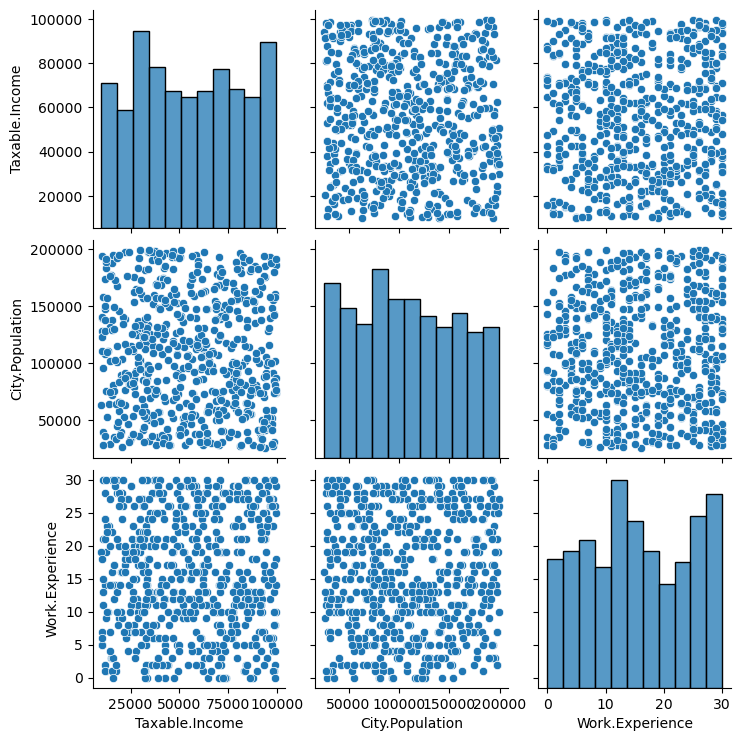

In [5]:
sns.pairplot(data)

In [6]:
corr = data.corr()
corr

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


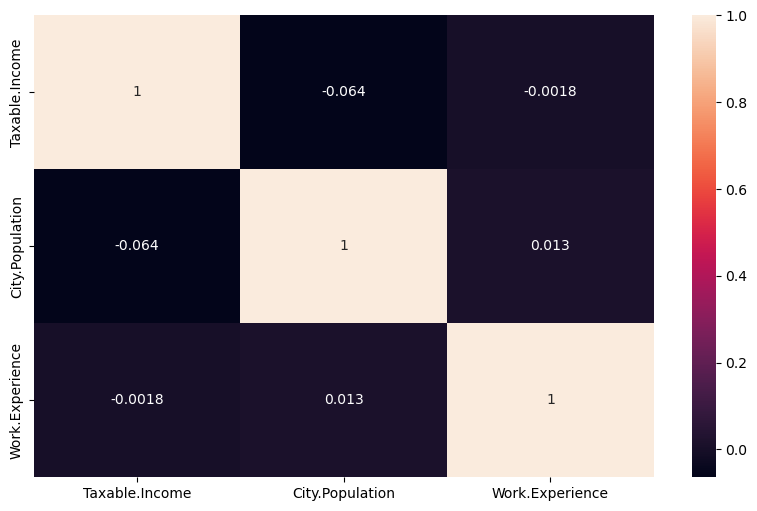

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()

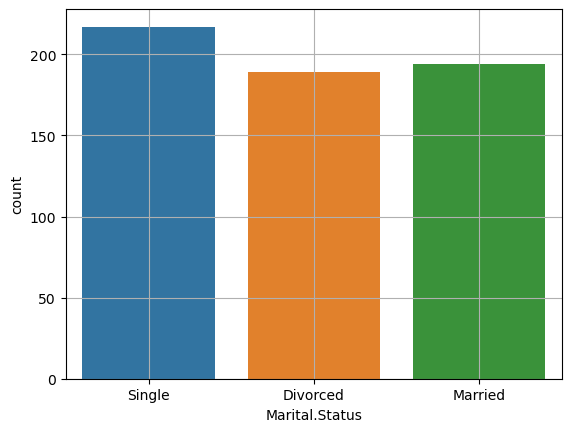

In [9]:
sns.countplot(data['Marital.Status'])
plt.grid(True)
plt.show()


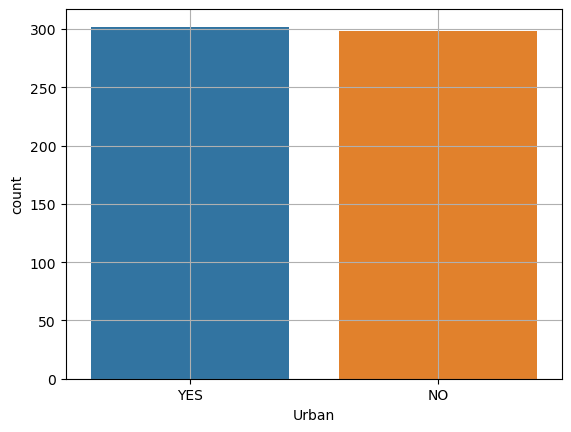

In [10]:
sns.countplot(data['Urban'])
plt.grid(True)
plt.show()


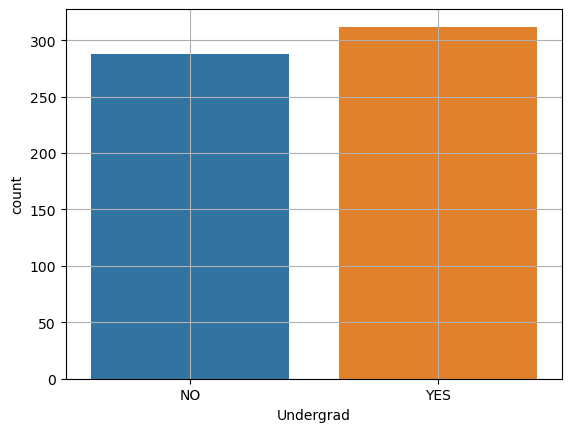

In [11]:
sns.countplot(data['Undergrad'])
plt.grid(True)
plt.show()

In [12]:
data['Taxable.Income'] = pd.cut(x=data['Taxable.Income'],bins = [10002,30000,99620], labels=['Risky','Good'])
data['Taxable.Income']

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

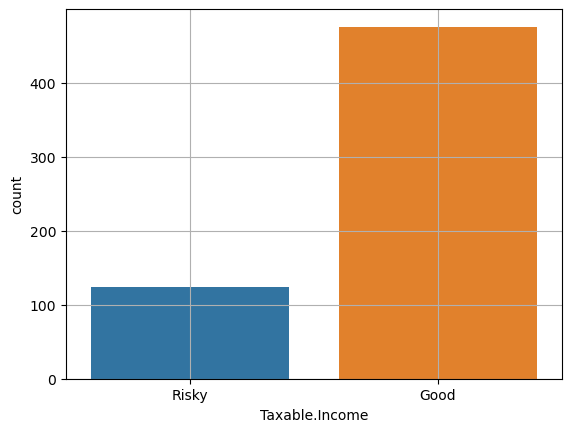

In [13]:
sns.countplot(data['Taxable.Income'])
plt.grid(True)
plt.show()

In [14]:
data['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [15]:
data = pd.get_dummies(data,columns = ["Taxable.Income"],drop_first=True)
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1


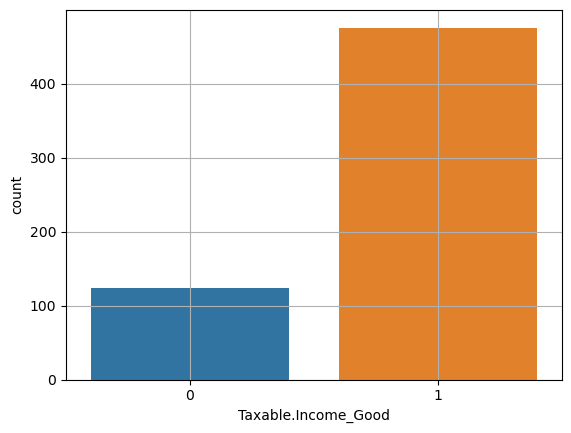

In [16]:
sns.countplot(data['Taxable.Income_Good'])
plt.grid(True)
plt.show()

In [17]:

#encoding categorical fraud_data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Taxable.Income_Good'] = label_encoder.fit_transform(data['Taxable.Income_Good'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])

data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income_Good
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [19]:
data['Taxable.Income_Good'].value_counts()

1    476
0    124
Name: Taxable.Income_Good, dtype: int64

In [20]:
X=data.drop('Taxable.Income_Good',axis=1)
y=data[['Taxable.Income_Good']]

In [21]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

In [22]:
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (402, 5) 
 y_train_shape : (402, 1)


In [23]:
print('x_test_shape :',x_test.shape ,'\n y_test_shape :',y_test.shape)

x_test_shape : (198, 5) 
 y_test_shape : (198, 1)


## Building Model

In [24]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

<Figure size 1600x800 with 0 Axes>

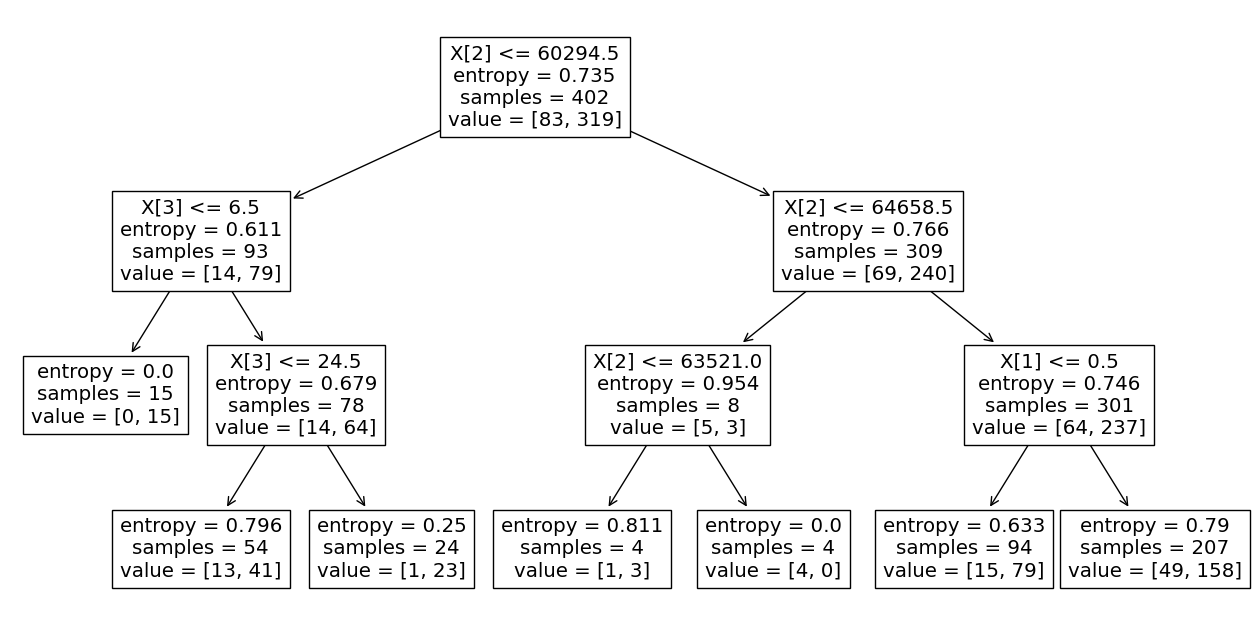

In [27]:
plt.figure(figsize=(16,8))
tree.plot_tree(model_entropy)
plt.show()

In [30]:
y_pred_train = model_entropy.predict(x_train)

In [31]:
y_pred_test = model_entropy.predict(x_test)
y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [32]:

accuracy_score(y_train,y_pred_train)

0.8034825870646766

In [33]:
confusion_matrix(y_train,y_pred_train)

array([[  4,  79],
       [  0, 319]], dtype=int64)

In [34]:
accuracy_score(y_test,y_pred_test)

0.7878787878787878

In [35]:
confusion_matrix(y_test,y_pred_test)

array([[  0,  41],
       [  1, 156]], dtype=int64)

## Gini Criterion model 

In [36]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

<Figure size 1600x800 with 0 Axes>

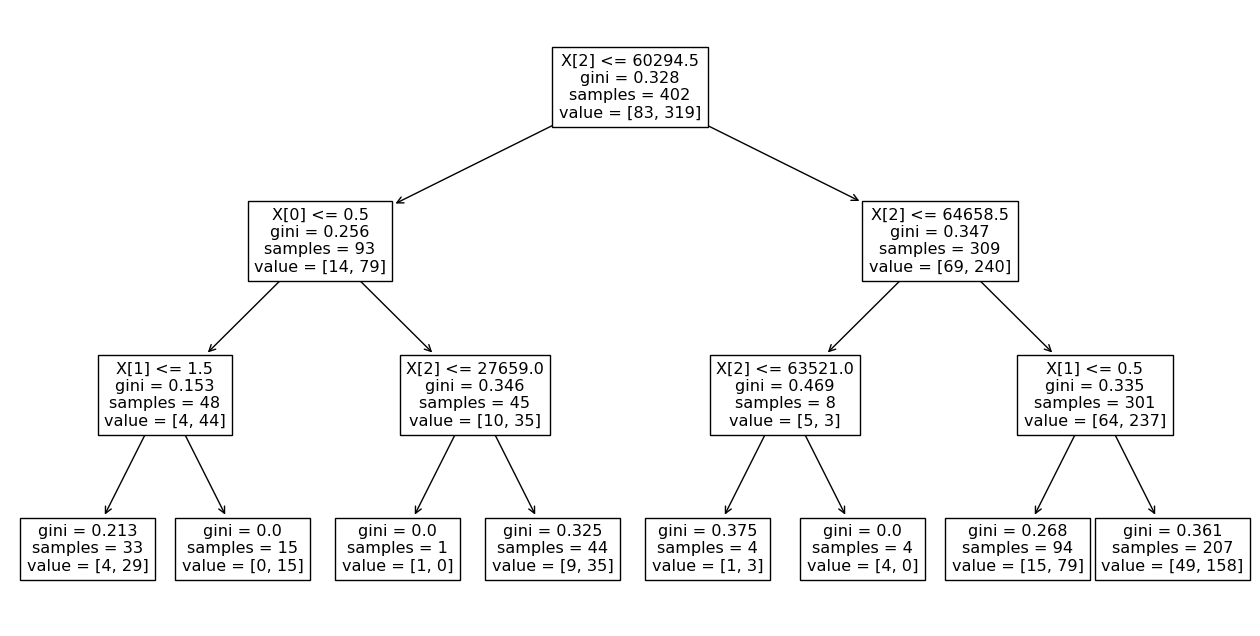

In [39]:
plt.figure(figsize=(16,8))
tree.plot_tree(model_gini)
plt.show()


In [53]:
y_pred_train_g = model_gini.predict(x_train)

In [54]:
y_pred_test_g = model_gini.predict(x_test)
y_pred_test_g

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [55]:
accuracy_score(y_train,y_pred_train_g)

0.8059701492537313

In [56]:
confusion_matrix(y_train,y_pred_train_g)

array([[  5,  78],
       [  0, 319]], dtype=int64)

In [58]:
accuracy_score(y_test,y_pred_test_g)

0.7878787878787878

In [61]:
confusion_matrix(y_test,y_pred_test_g)

array([[  0,  41],
       [  1, 156]], dtype=int64)